# Import data and create helper functions

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Create helper functions

In [2]:
def run_query(q):
    with sqlite3.connect('chinook.db') as conn:
        return pd.read_sql(q, conn)
    
def run_command(c):
    with sqlite3.connect('chinook.db') as conn:
        conn.isolation_level = None
        conn.execute(c)
    

In [3]:
# display tables using pandas
q = "SELECT * FROM sqlite_master WHERE type='table';"

run_query(q)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


In [4]:
# A query which returns the first 5 rows as a dataframe

q = "SELECT * FROM invoice_line LIMIT 5"
run_query(q)

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,1158,0.99,1
1,2,1,1159,0.99,1
2,3,1,1160,0.99,1
3,4,1,1161,0.99,1
4,5,1,1162,0.99,1


# Using joins

In [5]:
q = ("""
    SELECT il.track_id, t.name track_name, mt.name track_type, il.unit_price, il.quantity 
    FROM invoice_line il 
    INNER JOIN track t ON t.track_id = il.track_id 
    INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id 
    WHERE il.invoice_id = 4;
""")

run_query(q)

,track_id,track_name,track_type,unit_price,quantity
0,3448,"Lamentations of Jeremiah, First Set \ Incipit ...",Protected AAC audio file,0.99,1
1,2560,Violent Pornography,MPEG audio file,0.99,1
2,3336,War Pigs,Purchased AAC audio file,0.99,1
3,829,Let's Get Rocked,MPEG audio file,0.99,1
4,1872,Attitude,MPEG audio file,0.99,1
5,748,Dealer,MPEG audio file,0.99,1
6,1778,You're What's Happening (In The World Today),MPEG audio file,0.99,1
7,2514,Spoonman,MPEG audio file,0.99,1


In [6]:
# INNER JOIN PK_table ON PK_table.PK = FK_table.FK


q = ("""
    SELECT il.track_id, t.name track_name, ar.name artist_name, mt.name track_type, il.unit_price, il.quantity 
    FROM invoice_line il 
    INNER JOIN track t ON t.track_id = il.track_id 
    INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id 
    INNER JOIN album al ON al.album_id = t.album_id 
    INNER JOIN artist ar ON ar.artist_id = al.artist_id 
    WHERE il.invoice_id = 4;
    """)

run_query(q)

,track_id,track_name,artist_name,track_type,unit_price,quantity
0,3448,"Lamentations of Jeremiah, First Set \ Incipit ...",The King's Singers,Protected AAC audio file,0.99,1
1,2560,Violent Pornography,System Of A Down,MPEG audio file,0.99,1
2,3336,War Pigs,Cake,Purchased AAC audio file,0.99,1
3,829,Let's Get Rocked,Def Leppard,MPEG audio file,0.99,1
4,1872,Attitude,Metallica,MPEG audio file,0.99,1
5,748,Dealer,Deep Purple,MPEG audio file,0.99,1
6,1778,You're What's Happening (In The World Today),Marvin Gaye,MPEG audio file,0.99,1
7,2514,Spoonman,Soundgarden,MPEG audio file,0.99,1


# Nested queries with GROUP BY and ORDER BY

In [28]:
# Query that returns top 10 ARTISTS by track sales

q = ("""
    SELECT 
    ta.artist_name artist, COUNT(*) tracks_purchased 
    FROM invoice_line il 
    INNER JOIN ( 
            SELECT t.track_id, ar.name artist_name 
            FROM track t 
            INNER JOIN album al ON al.album_id = t.album_id 
            INNER JOIN artist ar ON ar.artist_id = al.artist_id ) ta 
           ON ta.track_id = il.track_id 
    GROUP BY 1 
    ORDER BY 2 DESC LIMIT 10;
    """)

run_query(q)

,artist,tracks_purchased
0,Queen,192
1,Jimi Hendrix,187
2,Nirvana,130
3,Red Hot Chili Peppers,130
4,Pearl Jam,129
5,AC/DC,124
6,Guns N' Roses,124
7,Foo Fighters,121
8,The Rolling Stones,117
9,Metallica,106


In [29]:
# Query that returns the top 5 ALBUMS by track sales

q = ("""
    SELECT ta.title album, ta.name artist, COUNT(*) tracks_purchased 
    FROM invoice_line il 
    INNER JOIN ( 
         SELECT t.track_id, al.title, ar.name 
        FROM track t 
        INNER JOIN album al ON al.album_id = t.album_id 
        INNER JOIN artist ar ON ar.artist_id = al.artist_id) ta 
        ON ta.track_id = il.track_id 
    GROUP BY 1, 2 
    ORDER BY 3 DESC LIMIT 5;
    """)

run_query(q)

,album,artist,tracks_purchased
0,Are You Experienced?,Jimi Hendrix,187
1,Faceless,Godsmack,96
2,Mezmerize,System Of A Down,93
3,Get Born,JET,90
4,The Doors,The Doors,83


# Concatenation and self-referencing tables

In [30]:
# Querying tables which reference themselves

# Query that returns name as a concatenation of first and last name and title of employee and name of their supervisor
# and supervisor's title. Include employees with no supervisors, order by employee name

# INNER JOIN PK_table ON PK_table.PK = FK_table.FK


q = ("""
    SELECT e1.first_name || ' ' || e1.last_name employee_name, e1.title employee_title, 
     e2.first_name || ' ' ||  e2.last_name supervisor_name, e2.title supervisor_title 
    FROM employee e1 
    LEFT JOIN employee e2 ON e1.reports_to = e2.employee_id 
    ORDER BY 1;
    """)

run_query(q)

,employee_name,employee_title,supervisor_name,supervisor_title
0,Andrew Adams,General Manager,None,None
1,Jane Peacock,Sales Support Agent,Nancy Edwards,Sales Manager
2,Laura Callahan,IT Staff,Michael Mitchell,IT Manager
3,Margaret Park,Sales Support Agent,Nancy Edwards,Sales Manager
4,Michael Mitchell,IT Manager,Andrew Adams,General Manager
5,Nancy Edwards,Sales Manager,Andrew Adams,General Manager
6,Robert King,IT Staff,Michael Mitchell,IT Manager
7,Steve Johnson,Sales Support Agent,Nancy Edwards,Sales Manager


In [31]:
# Return all customers with a name similar to Jen

q = ("""
    SELECT first_name, last_name, phone 
    FROM customer 
    WHERE first_name LIKE '%Jen%';
    """)
     
run_query(q)

,first_name,last_name,phone
0,Jennifer,Peterson,+1 (604) 688-2255


# Generating columns with a CASE statement

Write a query that summarizes the purchases of each customer, which includes:  
customer_category - a column that categorizes the customer based on their total purchases. The column should contain the following values:
* small spender - If the customer's total purchases are less than $40.

* big spender - If the customer's total purchases are greater than $100.

* regular - If the customer's total purchases are between \$40  and  $100 (inclusive).


In [32]:
q = ("""
    SELECT c.first_name || ' ' || c.last_name customer_name, COUNT(i.invoice_id) number_of_purchases, 
     SUM(i.total) total_spent, 
     CASE 
         WHEN SUM(i.total) < 40 THEN 'small spender' 
         WHEN SUM(i.total) > 100 THEN 'big spender' 
         ELSE 'regular' 
         END 
         AS customer_category 
     FROM invoice i 
    INNER JOIN customer c ON c.customer_id = i.customer_id 
    GROUP BY 1 ORDER BY 1;
    """)
     
run_query(q)

,customer_name,number_of_purchases,total_spent,customer_category
0,Aaron Mitchell,8,70.29,regular
1,Alexandre Rocha,10,69.30,regular
2,Astrid Gruber,9,69.30,regular
3,Bjørn Hansen,9,72.27,regular
4,Camille Bernard,9,79.20,regular
5,Daan Peeters,7,60.39,regular
6,Dan Miller,12,95.04,regular
7,Diego Gutiérrez,5,39.60,small spender
8,Dominique Lefebvre,9,72.27,regular
9,Eduardo Martins,12,60.39,regular


# Using a WITH clause

Create a query that shows summary data for every playlist in the Chinook database:
Use a WITH clause to create a named subquery with the following info:
* The unique ID for the playlist.
* The name of the playlist.
* The name of each track from the playlist.
* The length of each track in seconds.

In [33]:
q = ("""
    WITH playlist_info AS 
        (SELECT p.playlist_id, p.name playlist_name, t.name track_name, (t.milliseconds / 1000) length_seconds 
        FROM playlist p 
        LEFT JOIN playlist_track pt ON pt.playlist_id = p.playlist_id 
        LEFT JOIN track t ON t.track_id = pt.track_id)
    
SELECT playlist_id, playlist_name, COUNT(track_name) number_of_tracks, SUM(length_seconds) length_seconds 
    FROM playlist_info 
    GROUP BY 1, 2 
    ORDER BY 1
    """)
        
run_query(q)

,playlist_id,playlist_name,number_of_tracks,length_seconds
0,1,Music,3290,876049.0
1,2,Movies,0,NaN
2,3,TV Shows,213,500987.0
3,4,Audiobooks,0,NaN
4,5,90’s Music,1477,397970.0
5,6,Audiobooks,0,NaN
6,7,Movies,0,NaN
7,8,Music,3290,876049.0
8,9,Music Videos,1,294.0
9,10,TV Shows,213,500987.0


 Create a query that uses multiple named subqueries in a WITH clause to gather total sales data on customers from India. The results should be sorted by the customer_name column in alphabetical order.

In [34]:
q = ("""
    WITH 
    India AS 
        (SELECT * FROM customer 
         WHERE country = 'India' 
         ), 
    sum_total AS 
        (SELECT customer_id, SUM(total) total 
         FROM invoice 
         GROUP BY 1 
        ) 

SELECT i.first_name || ' ' || i.last_name customer_name, st.total total_purchases 
FROM India i 
INNER JOIN sum_total st ON st.customer_id = i.customer_id 
ORDER BY 1;
""")

run_query(q)

,customer_name,total_purchases
0,Manoj Pareek,111.87
1,Puja Srivastava,71.28


Query that identifies the customer from each country that has spent the most money at the store. 

In [14]:
q = ("""
    WITH 
    sum_total AS 
        (SELECT customer_id, SUM(total) total 
         FROM invoice 
         GROUP BY 1 
        ) 

SELECT c.country, c.first_name || ' ' || c.last_name customer_name, printf('%.2f', MAX(st.total)) total_purchased 
FROM sum_total st 
INNER JOIN customer c ON st.customer_id = c.customer_id 
GROUP BY 1 
ORDER BY 1; 
""")

run_query(q)

,country,customer_name,total_purchased
0,Argentina,Diego Gutiérrez,39.60
1,Australia,Mark Taylor,81.18
2,Austria,Astrid Gruber,69.30
3,Belgium,Daan Peeters,60.39
4,Brazil,Luís Gonçalves,108.90
5,Canada,François Tremblay,99.99
6,Chile,Luis Rojas,97.02
7,Czech Republic,František Wichterlová,144.54
8,Denmark,Kara Nielsen,37.62
9,Finland,Terhi Hämäläinen,79.20


# Business Case - Which Albums to Buy?

Suppose the Chinook record store has signed a deal with a new record label, and you're tasked with selecting three of the four available albums to add to the store. You have the artists' names and the genre of music they produce:
* Regal - Hip-Hop
* Red Tone - Punk
* Meteor and the Girls - Pop
* Slim Jim Bites - Blues

Based on the US sales from the Chinook record store, which three artists should be selected?

In [15]:
genre_popularity_usa = ("""
    WITH 
    usa_tracks AS
        (SELECT il.*
        FROM invoice_line il
        INNER JOIN invoice i ON i.invoice_id = il.invoice_id
        INNER JOIN customer c ON c.customer_id = i.customer_id
        WHERE c.country = 'USA')

SELECT g.name genre, COUNT(ut.invoice_line_id) tracks_sold, 
        CAST(COUNT(ut.invoice_line_id) AS FLOAT) / (SELECT COUNT(*) FROM usa_tracks) percentage_sold
FROM usa_tracks ut
INNER JOIN track t ON t.track_id = ut.track_id
INNER JOIN genre g ON g.genre_id = t.genre_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10

""")

run_query(genre_popularity_usa)

,genre,tracks_sold,percentage_sold
0,Rock,561,0.533777
1,Alternative & Punk,130,0.123692
2,Metal,124,0.117983
3,R&B/Soul,53,0.050428
4,Blues,36,0.034253
5,Alternative,35,0.033302
6,Latin,22,0.020932
7,Pop,22,0.020932
8,Hip Hop/Rap,20,0.019029
9,Jazz,14,0.013321


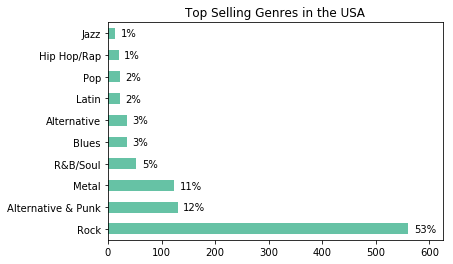

In [16]:
genre_sales_usa = run_query(genre_popularity_usa)
genre_sales_usa.set_index("genre",drop=True,inplace=True)

genre_sales_usa['tracks_sold'].plot.barh(
    title="Top Selling Genres in the USA",
    xlim=(0,625),
    colormap=plt.cm.Set2
)

# remove y-axis label
plt.ylabel('')

for i, label in enumerate(list(genre_sales_usa.index)):
    score = genre_sales_usa.loc[label, "tracks_sold"]
    # convert percentage_sold column to percent and add symbol
    label = (genre_sales_usa.loc[label, "percentage_sold"] * 100).astype(int).astype(str) + "%"
    plt.annotate(str(label), (score + 10, i - 0.15))


plt.show()

Based on our sales data of records in the US, we should purchase albums from the following artists:
* Red Tone (Punk)
* Slim Jim Bites (Blues)
* Meteor and the Girls Pop)

However, these three genres together make up only 17% of sales in the US, and ideally we would be signing artists from the rock genre, which account for 53% of sales. 

# Business Case - Evaluating Employee Performance

Considering that each customer for the Chinook store gets assigned a sales support agent within the company when they first make a purchase, analyze the purchases of customers belonging to each employee to see if any sales support agent is performing better or worse than the others. 

Consider if there are any other columns which might explain a variance in this metric. 

In [17]:
emp_sales_performance = ("""
WITH cust_total_spend AS 
        (
        SELECT c.support_rep_id, i.customer_id, SUM(i.total) total_spent 
        FROM invoice i
        INNER JOIN customer c ON c.customer_id = i.customer_id
        GROUP BY 2, 1) 

SELECT 
    e.first_name || ' ' || e.last_name employee_name, 
    e.hire_date, 
    SUM(cts.total_spent) total_sales
FROM employee e
INNER JOIN cust_total_spend cts ON e.employee_id = cts.support_rep_id
GROUP BY 1


""")

run_query(emp_sales_performance)



,employee_name,hire_date,total_sales
0,Jane Peacock,2017-04-01 00:00:00,1731.51
1,Margaret Park,2017-05-03 00:00:00,1584.00
2,Steve Johnson,2017-10-17 00:00:00,1393.92


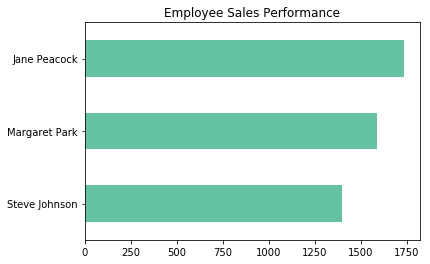

In [115]:
emp_performance = run_query(emp_sales_performance)

emp_performance.set_index("employee_name",drop=True,inplace=True)
emp_performance.sort_values("total_sales", inplace=True)

emp_performance.plot.barh(
    title = "Employee Sales Performance", 
    legend = False, 
    colormap=plt.cm.Set2)

plt.ylabel('')
plt.show()


While there is approximately 20% difference in sales between Jane and Steve, the difference roughly corresponds with the differences in their hiring dates.



# Business Case - Customer Segmentation by Country

Construct a query which analyses sales data for customers from country.  Include in this analysis:
* total number of customers
* total value of sales
* average value of sales per customer
* average order value

There are a number of countries with only one customer. These countries should be grouped as "Other".

In [48]:
customers_by_country = ("""
    WITH country_or_other AS
        (SELECT
            CASE 
                WHEN (
                    SELECT COUNT(*)  
                    FROM customer  
                    WHERE country = c.country
                    ) = 1 THEN "Other"
                    ELSE c.country
                END AS country, 
            c.customer_id, 
            il.*
        FROM invoice_line il
        INNER JOIN invoice i ON i.invoice_id = il.invoice_id
        INNER JOIN customer c ON i.customer_id = c.customer_id
        )
SELECT
    country, 
    customers, 
    total_sales, 
    customer_lifetime_value, 
    average_order
FROM 
    (        
    SELECT 
        country, 
        COUNT(DISTINCT customer_id) customers, 
        SUM(unit_price) total_sales, 
        SUM(unit_price) / COUNT(DISTINCT customer_id) customer_lifetime_value, 
        SUM(unit_price) / COUNT(DISTINCT invoice_id) average_order, 
        CASE
            WHEN country = "Other" THEN 1
            ELSE 0
        END AS sort
    FROM country_or_other
    GROUP BY country
    ORDER BY sort ASC, total_sales DESC)
        

""")

run_query(customers_by_country)


,country,customers,total_sales,customer_lifetime_value,average_order
0,USA,13,1040.49,80.037692,7.942672
1,Canada,8,535.59,66.948750,7.047237
2,Brazil,5,427.68,85.536000,7.011148
3,France,5,389.07,77.814000,7.781400
4,Germany,4,334.62,83.655000,8.161463
5,Czech Republic,2,273.24,136.620000,9.108000
6,United Kingdom,3,245.52,81.840000,8.768571
7,Portugal,2,185.13,92.565000,6.383793
8,India,2,183.15,91.575000,8.721429
9,Other,15,1094.94,72.996000,7.448571


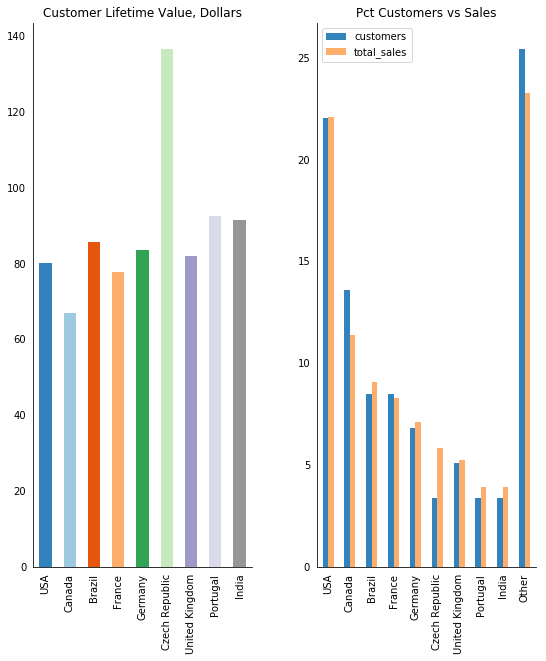

In [112]:
import numpy as np

country_metrics = run_query(customers_by_country)
country_metrics.set_index("country", drop=True, inplace=True)
colors = [plt.cm.tab20c(i) for i in np.linspace(0, 1, country_metrics.shape[0])]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 10))
ax1, ax2 = axes.flatten()
fig.subplots_adjust(hspace=.5, wspace=.3)

# left

ltv = country_metrics["customer_lifetime_value"].copy()
ltv.index.name = ''
ltv.drop("Other",inplace=True)
ltv.plot.bar(
    ax=ax1,
    color=colors,
    title="Customer Lifetime Value, Dollars"
)
ax1.tick_params(top="off", right="off", left="off", bottom="off")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)


# right

cvd_cols = ["customers","total_sales"]
custs_vs_dollars = country_metrics[cvd_cols].copy()
custs_vs_dollars.index.name = ''
for c in cvd_cols:
    custs_vs_dollars[c] /= custs_vs_dollars[c].sum() / 100
custs_vs_dollars.plot.bar(
    ax=ax2,
#     color=colors,
    color = [(0.19215686274509805, 0.50980392156862742, 0.74117647058823533, 1.0),
 (0.99215686274509807, 0.68235294117647061, 0.41960784313725491, 1.0)], 
    title="Pct Customers vs Sales"
)
ax2.tick_params(top="off", right="off", left="off", bottom="off")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.show()